Import heartbeat data from PASCO -- 
decided for now that fft is simpler when using arrays of data. Had difficulty getting it to work with pandas -- update: it wasn't actually that hard. saved with ending '-pasco'

In [39]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
# from matplotlib import interactive
# interactive(True)
%matplotlib nbagg

In [40]:
# user-modified area:
file_dir = ''     # './data/'  if in a nested folder called 'data'
filename= '2018_02 RPS heartbeat.csv'

# load data file
filepath = file_dir+filename
data = np.genfromtxt(filepath,delimiter=',',skip_header=2 )
# y_values = data[:,0]
# df = pd.read_csv('2018_02 RPS heartbeat.csv',skiprows=1)
time_sec = data[:,1]
voltage_mV = data[:,2]

In [41]:
data

array([[             nan,   0.00000000e+00,   0.00000000e+00,
                     nan],
       [             nan,   5.00000000e-03,   0.00000000e+00,
                     nan],
       [             nan,   1.00000000e-02,   0.00000000e+00,
                     nan],
       ..., 
       [             nan,   3.73400000e+01,   4.64000000e-01,
                     nan],
       [             nan,   3.73450000e+01,   5.52000000e-01,
                     nan],
       [             nan,   3.73500000e+01,   5.52000000e-01,
                     nan]])

<IPython.core.display.Javascript object>


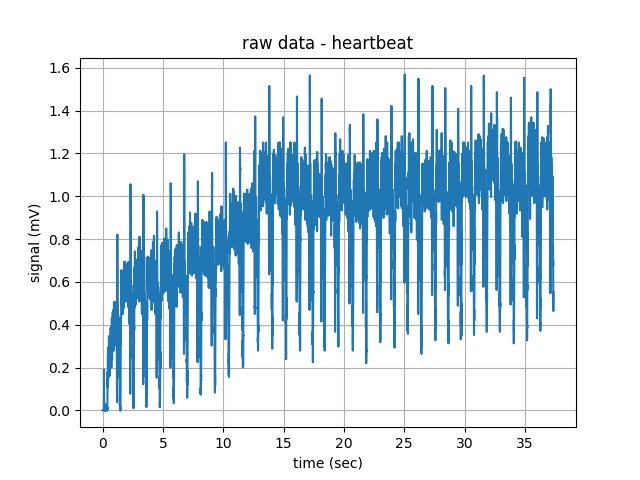

In [31]:
plt.plot(time_sec,voltage_mV)
plt.ylabel('signal (mV)')
plt.xlabel('time (sec)')
plt.grid()
plt.title('raw data - heartbeat')
plt.show()

<IPython.core.display.Javascript object>


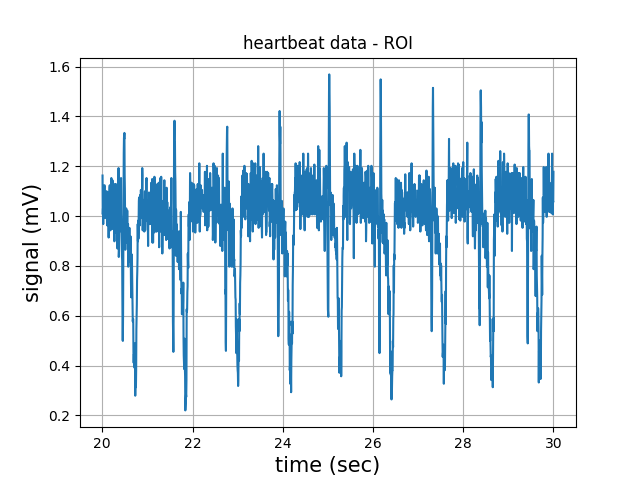

In [32]:
start_time, stop_time = 20, 30

start_time_idx = np.where(time_sec > start_time)[0][0]
stop_time_idx = np.where(time_sec > stop_time)[0][0]
x_ROI = time_sec[start_time_idx:stop_time_idx]
y_ROI = voltage_mV[start_time_idx:stop_time_idx]



plt.plot(x_ROI,y_ROI)
plt.grid()
plt.xlabel('time (sec)',fontsize=15)
plt.ylabel('signal (mV)',fontsize=15)
plt.title('heartbeat data - ROI')
plt.show()

In [33]:
Y_FFT = np.fft.fft(y_ROI - np.mean(y_ROI))
y2 = Y_FFT * np.conjugate(Y_FFT)
pow = abs(y2[1:len(Y_FFT)//2] + y2[:len(Y_FFT)//2:-1])
DT = x_ROI[1]-x_ROI[0]   # sample time
freq = (np.fft.fftfreq(x_ROI.shape[0])/DT)[1:len(Y_FFT)//2]


<IPython.core.display.Javascript object>


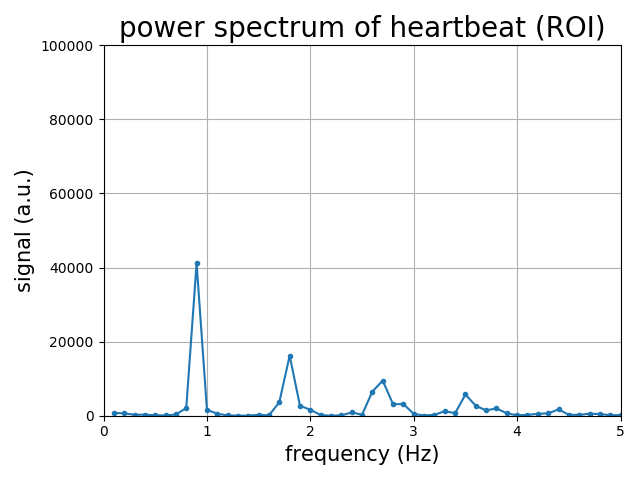

In [34]:
title = 'power spectrum of heartbeat (ROI)'
xaxis_label = 'frequency (Hz)'
yaxis_label = 'signal (a.u.)'

plt.plot(freq,pow,'.-') #,label='FFT of file '+filename[0:6])

plt.xlabel(xaxis_label,fontsize=15)
plt.ylabel(yaxis_label,fontsize=15)
plt.grid()
plt.title(title,fontsize=20)

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.xlim([0,5])
plt.ylim([0,1e5])
# plt.legend(frameon=False,loc='best') 
plt.tight_layout() 
plt.show()
# save the figure as a png file. It will be saved to the same directory as your program.
# plt.savefig('mydata.png',dpi=400)

# save the analyzed data to a text file with a name corresponding to the original filename
# np.savetxt(file_dir+'FFT_'+filename[0:5]+'.txt', (freq,pow), delimiter=',',fmt='%.4e')

<IPython.core.display.Javascript object>


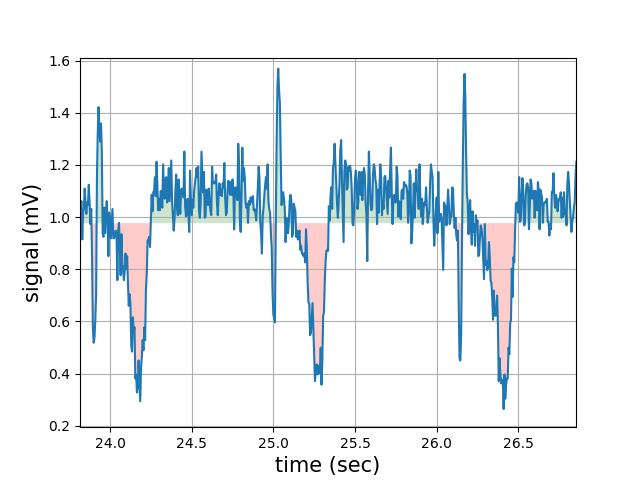

In [35]:
fig, ax = plt.subplots()
ax.plot(x_ROI,y_ROI)
# y_ROI.plot()
plt.xlabel('time (sec)',fontsize=15)
plt.ylabel('signal (mV)',fontsize=15)
plt.grid()    # y_ROI - np.mean(y_ROI)
# plt.fill_between(where=df['accelerometerAccelerationZ(G)'] < -1,facecolor='blue', alpha=0.5)
# d = df['date1'].values
# # plt.fill_between(d, 0, df['accelerometerAccelerationZ(G)'],
# #                 where=df['accelerometerAccelerationZ(G)'] >= -1,
# #                 facecolor='green', alpha=0.2, interpolate=True)
# ax.fill_between(df.index, -1,df['accelerometerAccelerationZ(G)'],
#                 where=df['accelerometerAccelerationZ(G)'] >= -1,
#                 acecolor='green', alpha=0.2, interpolate=True)
ax.fill_between(x_ROI, np.mean(y_ROI),y_ROI,
                where=y_ROI >= np.mean(y_ROI),
                facecolor='green', alpha=0.2, interpolate=True)
ax.fill_between(x_ROI, np.mean(y_ROI),y_ROI,
                where=y_ROI < np.mean(y_ROI),
                facecolor='red', alpha=0.2, interpolate=True)
plt.show()


<IPython.core.display.Javascript object>


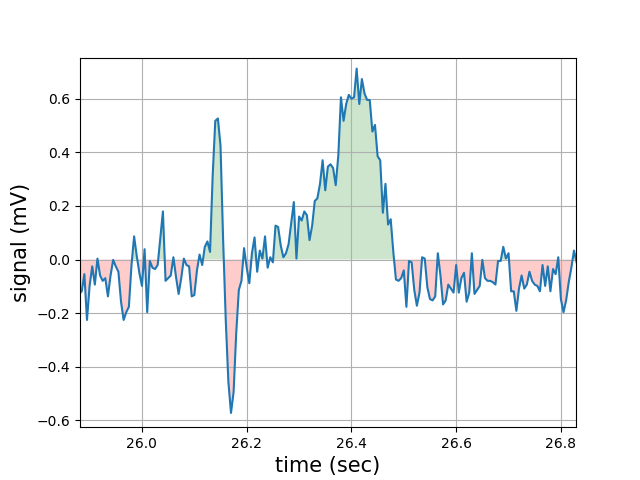

In [38]:
y_ROI_flipped = -(y_ROI - np.mean(y_ROI))


fig, ax = plt.subplots()
ax.plot(x_ROI,y_ROI_flipped)
# y_ROI.plot()
plt.xlabel('time (sec)',fontsize=15)
plt.ylabel('signal (mV)',fontsize=15)
plt.grid()    # y_ROI - np.mean(y_ROI)
# plt.fill_between(where=df['accelerometerAccelerationZ(G)'] < -1,facecolor='blue', alpha=0.5)
# d = df['date1'].values
# # plt.fill_between(d, 0, df['accelerometerAccelerationZ(G)'],
# #                 where=df['accelerometerAccelerationZ(G)'] >= -1,
# #                 facecolor='green', alpha=0.2, interpolate=True)
# ax.fill_between(df.index, -1,df['accelerometerAccelerationZ(G)'],
#                 where=df['accelerometerAccelerationZ(G)'] >= -1,
#                 acecolor='green', alpha=0.2, interpolate=True)
ax.fill_between(x_ROI, np.mean(y_ROI_flipped),y_ROI_flipped,
                where=y_ROI_flipped >= np.mean(y_ROI_flipped),
                facecolor='green', alpha=0.2, interpolate=True)
ax.fill_between(x_ROI, np.mean(y_ROI_flipped),y_ROI_flipped,
                where=y_ROI_flipped < np.mean(y_ROI_flipped),
                facecolor='red', alpha=0.2, interpolate=True)
plt.show()